In [2]:
import torch
import torch.nn as nn
import math

In [ ]:
class InputEmbeddings(nn.Module):

    def __init__(self, d_model: int, vocab_size:int): #constructor to define the dimesion of model and vocab
        super().__init__()
        self.d_model = d_model
        self.vocab_size = vocab_size
        self.embedding = nn.Embedding(vocab_size, d_model)

    def forward(self, x):
        return self.embedding(x) * math.sqrt(self.d_model) # learnable parameter
    



In [ ]:
class PositionalEncoding(nn.Module):

    def __init__(self, d_model: int,seq_len: int, dropout: float) -> None:
        super().__init__()
        self.d_model = d_model
        self.seq_len = seq_len
        self.dropout = dropout

        # Initialize a matrix of shape of (seq_len, d_model)
        pe = torch.zeros(seq_len, d_model)

        # Create a vector of shape (seq_len)
        position = torch.arange(0, seq_len, dtype=torch.float).unsqueeze(1) # This will return tensor of 2d shape by adding a dimension on the given postion 
        div_term = torch.exp(torch.arange(0, d_model, 2).float() * (-math.log(10000.0)/ d_model))
        
        # apply the sin to even positions and cos to odd
        # seq_len,d_model --> seq_len,1 * 1,d_model
        pe[:,0::2] = torch.sin(position * div_term)
        pe[:,1::2] = torch.cos(position * div_term)

        pe = pe.unsqueeze(0) #(1, seq_len, d_model) --> (seq_len, d_model) converted 2d in batch by adding batch dimension


        self.register_buffer('pe', pe) # this allows the tensor to saved inside the model along with model state, not a learmable paramter

    def forward(self, x):
        x = x + (self.pe[:,:x.shape[1],:]).requires_grad_(False) # Adding positional embeddings to the inputs embeddings by slicing it. Since we don't need these to be trained, there requrie_grad=False
        return self.dropout

###  Layer Normalization 
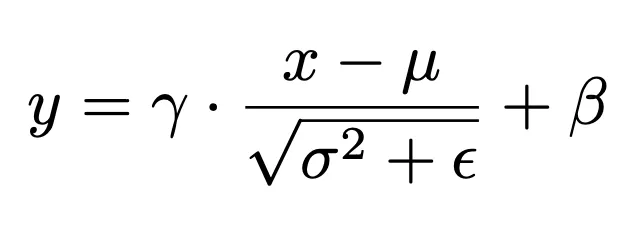

In [ ]:
class LayerNormalization(nn.Module):

    def __init__(self, eps:float = 10**-6) -> None:
        super().__init__()
        self.eps = eps
        self.alpha = nn.Parameter(torch.ones(1)) # Multiplied
        self.bias = nn.Parameter(torch.zeros(1)) # Added

    def forward(self, x):
        mean = x.mean(dim = -1, keepdim=True)  # row wise calculation for std and mean 
        std = x.std(dim = -1, keepdim=True) 

        return self.alpha * (x-mean)/(std + self.eps) + self.bias

